# Solución de ejercicios liceo Volta 2020-21
Durante el año lectivo 2020-21 los estudiantes del Liceo del Gimnasio Alesandro Volta han respondido una encuesta al finalizar la solución de ejercicios propuestos por el profesor.

La encuesta es de google forms, y los resultados están guardados en una hoja de google sheets. Para su análisis se harán los siguientes pasos:
1. Obtener datos de la hoja de cálculo
2. Analizar por curso y por taller
3. Analizar por estudiante
4. ....

### Importando librerias necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from helpers import *

## Autenticarse con google y obtener datos

In [2]:
SCOPES = ['https://www.googleapis.com/auth/spreadsheets']
SPREADSHEET_ID = "1mpuSZwgZO_CAVO1g90UDQAri_rip98Hrs939t3Jpd5Q"
students_spreadsheet_id = "1rWju7T0eNFGi-FoIRgrF87-IsQu40AP087tzzKq8fyg"
RANGE_NAME = "Respuestas de formulario 1"
range_name2 = "Hoja 1"

In [3]:
data = pull_sheet_data(SCOPES, SPREADSHEET_ID, RANGE_NAME)
data2 = pull_sheet_data(SCOPES, students_spreadsheet_id, range_name2)

COMPLETE: Data copied
COMPLETE: Data copied


In [4]:
surveyDf = pd.DataFrame(data[1:], columns=data[0])
studentsDf = pd.DataFrame(data2[1:], columns = data2[0])

In [5]:
surveyDf.head()

,Marca temporal,Dirección de correo electrónico,Código taller,Cómo te fue: [Ejercicio 1],Cómo te fue: [Ejercicio 2],Cómo te fue: [Ejercicio 3],Cómo te fue: [Ejercicio 4],Cómo te fue: [Ejercicio 5]
0,3/9/2020 7:54:15,mattiapietro.canale@gimnasiovolta.edu.co,2202021001,Excelente,Excelente,Excelente,Excelente,Excelente
1,3/9/2020 8:04:52,mariaalexandra.manriqueb@gimnasiovolta.edu.co,2202021001,Excelente,Bien,Excelente,Excelente,Bien
2,3/9/2020 8:05:03,davidalejandro.plazasr@gimnasiovolta.edu.co,2202021001,Excelente,Excelente,Bien,Bien,Excelente
3,3/9/2020 8:05:54,martin.polaniag@gimnasiovolta.edu.co,2202021001,Excelente,Excelente,Bien,Bien,Bien
4,3/9/2020 8:05:59,lauragabriela.gonzalezj@gimnasiovolta.edu.co,2202021001,Bien,Bien,Regular,Regular,Bien


In [6]:
studentsDf.head()

,Nombre,Curso,Correo
0,"Arámbula Jaimes, Nicolás Andrés",1,nicolasandres.arambulaj@gimnasiovolta.edu.co
1,"Castro Céspedes, Jorge Andrés",1,jorgeandres.castroc@gimnasiovolta.edu.co
2,"Castro Medina, Francisco",1,francisco.castrom@gimnasiovolta.edu.co
3,"Clavijo Rey, Mariana",1,mariana.clavijor@gimnasiovolta.edu.co
4,"Cotes Ontibón, Aníbal Santiago",1,anibalsantiago.coteso@gimnasiovolta.edu.co


## Limpiar los datos

### Asignar nombres y tipos de columnas adecuados

In [7]:
surveyDf.columns = ['dateTime', 'email', 'psCode',
       'problem1', 'problem2',
       'problem3', 'problem4',
       'problem5']

In [8]:
surveyDf.dtypes

dateTime    object
email       object
psCode      object
problem1    object
problem2    object
problem3    object
problem4    object
problem5    object
dtype: object

In [9]:
surveyDf['dateTime'] = surveyDf['dateTime'].astype('datetime64')

In [10]:
studentsDf.columns = ["nombre", "curso", "email"]

### Unir la base de datos de estudiantes con la encuesta

In [11]:
df = pd.merge(surveyDf, studentsDf, on="email")

In [12]:
df.head()

,dateTime,email,psCode,problem1,problem2,problem3,problem4,problem5,nombre,curso
0,2020-03-09 07:54:15,mattiapietro.canale@gimnasiovolta.edu.co,2202021001,Excelente,Excelente,Excelente,Excelente,Excelente,"Canale , Mattia Pietro",2
1,2020-06-09 11:19:24,mattiapietro.canale@gimnasiovolta.edu.co,2202021002,Excelente,Excelente,Excelente,Excelente,Excelente,"Canale , Mattia Pietro",2
2,2020-03-09 08:04:52,mariaalexandra.manriqueb@gimnasiovolta.edu.co,2202021001,Excelente,Bien,Excelente,Excelente,Bien,"Manrique Botero, Maria Alexandra",2
3,2020-07-09 06:52:39,mariaalexandra.manriqueb@gimnasiovolta.edu.co,2202021002,Bien,Bien,Regular,Bien,Bien,"Manrique Botero, Maria Alexandra",2
4,2020-03-09 08:05:03,davidalejandro.plazasr@gimnasiovolta.edu.co,2202021001,Excelente,Excelente,Bien,Bien,Excelente,"Plazas Rodriguez, David Alejandro",2


## Tomar solo la respuesta mas reciente de cada estudiante en cada taller

In [13]:
df = df.loc[df.groupby(["curso",'nombre','psCode']).dateTime.idxmax()]

In [14]:
df.to_csv('cleanData.csv')

In [15]:
for psCode in df['psCode'].unique():
    
    print(psCode)

1202021001
1202021002
1202021004
2202021001
2202021002
2202021004
2202021005
3202021001
3202021002
3202021003
4202021001


In [16]:
problemas = ["problem1", "problem2", "problem3", "problem4", "problem5"]
for problema in problemas:
    df[problema].replace(["Excelente","Bien", "Regular", "No lo hice", "Mal"], [0,1,2,3,4], inplace = True)
df.head()

,dateTime,email,psCode,problem1,problem2,problem3,problem4,problem5,nombre,curso
36,2020-03-09 12:08:36,nicolasandres.arambulaj@gimnasiovolta.edu.co,1202021001,2,0,1,0,1,"Arámbula Jaimes, Nicolás Andrés",1
38,2020-10-09 11:46:16,nicolasandres.arambulaj@gimnasiovolta.edu.co,1202021002,0,0,1,1,0,"Arámbula Jaimes, Nicolás Andrés",1
40,2020-12-09 17:08:45,nicolasandres.arambulaj@gimnasiovolta.edu.co,1202021004,0,0,1,1,0,"Arámbula Jaimes, Nicolás Andrés",1
163,2020-10-09 09:15:01,jorgeandres.castroc@gimnasiovolta.edu.co,1202021001,2,1,3,1,4,"Castro Céspedes, Jorge Andrés",1
164,2020-10-09 11:23:34,jorgeandres.castroc@gimnasiovolta.edu.co,1202021002,0,1,0,1,0,"Castro Céspedes, Jorge Andrés",1


## Calcular puntaje de dificultad que cada estudiante le asignó a cada taller

In [17]:
df['dificultad'] =df[problemas].sum(axis=1)

In [18]:
df.head()

,dateTime,email,psCode,problem1,problem2,problem3,problem4,problem5,nombre,curso,dificultad
36,2020-03-09 12:08:36,nicolasandres.arambulaj@gimnasiovolta.edu.co,1202021001,2,0,1,0,1,"Arámbula Jaimes, Nicolás Andrés",1,4
38,2020-10-09 11:46:16,nicolasandres.arambulaj@gimnasiovolta.edu.co,1202021002,0,0,1,1,0,"Arámbula Jaimes, Nicolás Andrés",1,2
40,2020-12-09 17:08:45,nicolasandres.arambulaj@gimnasiovolta.edu.co,1202021004,0,0,1,1,0,"Arámbula Jaimes, Nicolás Andrés",1,2
163,2020-10-09 09:15:01,jorgeandres.castroc@gimnasiovolta.edu.co,1202021001,2,1,3,1,4,"Castro Céspedes, Jorge Andrés",1,11
164,2020-10-09 11:23:34,jorgeandres.castroc@gimnasiovolta.edu.co,1202021002,0,1,0,1,0,"Castro Céspedes, Jorge Andrés",1,2


## Estudiantes con mayor dificultad

In [21]:
df[["nombre", "dificultad"]].groupby(["nombre"]).sum().sort_values("dificultad", ascending=False)

,dificultad
nombre,
"Moreno Delgado, María José",41
"Rojas Gómez, Laura Natalia",37
"Vega Vergara, Julian Esteban",34
"Moreno Cañizares, Luis Alejandro",32
"Luces Sandoval, Diego Andrés",29
...,...
"Hernández Pardo, Julián Andrés",2
"Alvarado Rodríguez, Julián Alberto",2
"Arámbula Jaimes, David Santiago",1


## Dificultad promedio por taller

In [23]:
df[["psCode", "dificultad"]].groupby(["psCode"]).sum().sort_values("dificultad", ascending=False)

,dificultad
psCode,
3202021001,134
2202021001,114
1202021001,111
3202021003,77
2202021002,75
2202021004,72
3202021002,67
4202021001,61
1202021004,59


<AxesSubplot:>

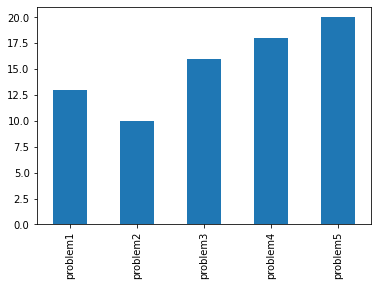

In [34]:
df.loc[df["psCode"]=="3202021003"][["problem1", "problem2", "problem3", "problem4", "problem5"]].sum(axis=0).plot(kind="bar")

## Número de talleres presentados por estudiante vs máximo clase

In [19]:
studentsDf['nombre']

0     Arámbula Jaimes, Nicolás Andrés
1       Castro Céspedes, Jorge Andrés
2            Castro Medina, Francisco
3                Clavijo Rey, Mariana
4      Cotes Ontibón, Aníbal Santiago
                   ...               
69               Mineo Pachón, Matteo
70            Ortolan Conto, Emanuela
71               Sánchez Páez, Felipe
72           Suárez Dolmen, Alejandro
73         Torres Prada, Sarah Elvira
Name: nombre, Length: 74, dtype: object

In [20]:
participation = df[["curso", "nombre", "psCode"]].groupby(["nombre","curso"]).count()
participation =participation.rename(columns={"psCode":"talleres"})

participation = participation.reset_index()

In [21]:
participation.index

RangeIndex(start=0, stop=47, step=1)

In [22]:
newStudents = []
for estudiante in studentsDf['nombre']:
    if estudiante not in list(df['nombre']):
        newStudent = {"nombre":estudiante, "curso":studentsDf.loc[studentsDf['nombre']==estudiante]['curso'].iloc[0], "talleres":0}
        newStudents.append(newStudent)
newDf = pd.DataFrame(newStudents)
participation = participation.append(newDf)

In [23]:
participation = participation.sort_values(by=["curso", "nombre"])

In [49]:
numTalleres = participation[["curso", "talleres"]].groupby('curso').max()
numTalleres

,talleres
curso,
1,1
2,2
3,2
4,0


In [41]:
maxTalleres = []
for index in participation.index:    
    curso = participation.iloc[index]['curso']
    maxTalleres.append(numTalleres.loc[curso, "talleres"])
participation['maxTalleres']    = maxTalleres

In [48]:
participation.tail()

,nombre,curso,talleres,maxTalleres,nota
22,"Mineo Pachón, Matteo",4,0,2,2.0
23,"Ortolan Conto, Emanuela",4,0,2,2.0
25,"Suárez Dolmen, Alejandro",4,0,2,2.0
24,"Sánchez Páez, Felipe",4,0,2,2.0
26,"Torres Prada, Sarah Elvira",4,0,2,2.0


In [45]:
participation['nota'] = round(2 + 8 * participation['talleres']/participation['maxTalleres'],1)

In [47]:
participation

,nombre,curso,talleres,maxTalleres,nota
0,"Arámbula Jaimes, Nicolás Andrés",1,1,1,10.0
0,"Castro Céspedes, Jorge Andrés",1,0,1,2.0
6,"Castro Medina, Francisco",1,1,1,10.0
7,"Clavijo Rey, Mariana",1,1,1,10.0
9,"Cotes Ontibón, Aníbal Santiago",1,1,1,10.0
...,...,...,...,...,...
22,"Mineo Pachón, Matteo",4,0,2,2.0
23,"Ortolan Conto, Emanuela",4,0,2,2.0
25,"Suárez Dolmen, Alejandro",4,0,2,2.0
24,"Sánchez Páez, Felipe",4,0,2,2.0


In [ ]:
df[["psCode", "dificultad"]].groupby(['psCode']).mean().plot(kind="bar")

## Graficar diagramas de barras para cada taller

In [ ]:
df[df['psCode']=="2202021001"]["problem1"].value_counts().plot(kind="bar");

In [ ]:
df.groupby(["psCode", "problem1","problem2", "problem3", "problem4", "problem5" ]).count()